https://andreask.cs.illinois.edu/cs357-s15/public/demos/02-norms/Condition%20number.html

Condition number plot

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt



Let's grab a 2×2
matrix A:

In [2]:
A = np.array([[3, -1], [0, 2]], dtype=np.float64)
A

array([[ 3., -1.],
       [ 0.,  2.]])

And its inverse:

In [3]:
Ainv = la.inv(A)
Ainv

array([[0.33333333, 0.16666667],
       [0.        , 0.5       ]])



Now we would like to figure out where that matrix puts all the vectors with 2-norm 1.

To do so, let's make an array of vectors with vectors with norm 1:


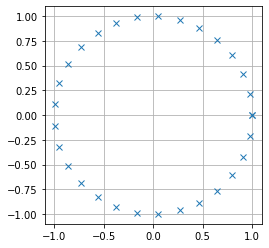

In [4]:
phi = np.linspace(0, 2*np.pi, 30)
xs = np.array([
    np.cos(phi),
    np.sin(phi)
])

pt.gca().set_aspect("equal")
pt.plot(xs[0], xs[1], "x")
pt.grid()

In [5]:
Axs = A.dot(xs)
Axs.shape

(2, 30)

In [6]:
norm = la.norm(A, 2)
print(norm)

3.2566165379829393


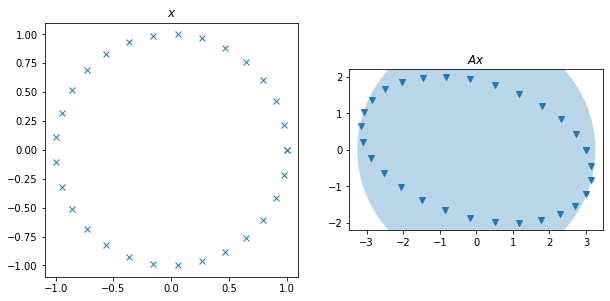

In [7]:
pt.figure(figsize=(10, 5))

pt.subplot(121)
pt.title("$x$")
pt.plot(xs[0], xs[1], "x")
pt.gca().set_aspect("equal")

pt.subplot(122)
pt.title("$Ax$")
pt.plot(Axs[0], Axs[1], "v")

circle = pt.Circle([0, 0], norm, alpha=0.3, lw=0)
fig = pt.gcf()
fig.gca().add_artist(circle)


pt.gca().set_aspect("equal")

Next, let's see what happens to small perturbations at each of the x and Ax

points.

To that end, let's make an array ys of shape 2×Np×Np
, where Np is the number of points above.

In [8]:
# ys has axes: XY x Npoints x Npoints

perturbation_size = 0.1
ys = perturbation_size * xs.reshape(2, -1, 1) + xs.reshape(2, 1, -1)
np.round(ys, 2)

array([[[ 1.1 ,  1.08,  1.01, ...,  1.01,  1.08,  1.1 ],
        [ 1.1 ,  1.07,  1.01, ...,  1.01,  1.07,  1.1 ],
        [ 1.09,  1.07,  1.  , ...,  1.  ,  1.07,  1.09],
        ...,
        [ 1.09,  1.07,  1.  , ...,  1.  ,  1.07,  1.09],
        [ 1.1 ,  1.07,  1.01, ...,  1.01,  1.07,  1.1 ],
        [ 1.1 ,  1.08,  1.01, ...,  1.01,  1.08,  1.1 ]],

       [[ 0.  ,  0.21,  0.42, ..., -0.42, -0.21, -0.  ],
        [ 0.02,  0.24,  0.44, ..., -0.4 , -0.19,  0.02],
        [ 0.04,  0.26,  0.46, ..., -0.38, -0.17,  0.04],
        ...,
        [-0.04,  0.17,  0.38, ..., -0.46, -0.26, -0.04],
        [-0.02,  0.19,  0.4 , ..., -0.44, -0.24, -0.02],
        [-0.  ,  0.21,  0.42, ..., -0.42, -0.21, -0.  ]]])

In [9]:
ys.shape
# what is what in these coordinates?
# Perhaps, 
# 2 is plain coordinates - horizontal and vertical.
# 30 centers, and
# 30 points in a circle around each center

(2, 30, 30)

In [10]:
Ays = np.tensordot(A, ys, axes=1)
Ays.shape

(2, 30, 30)

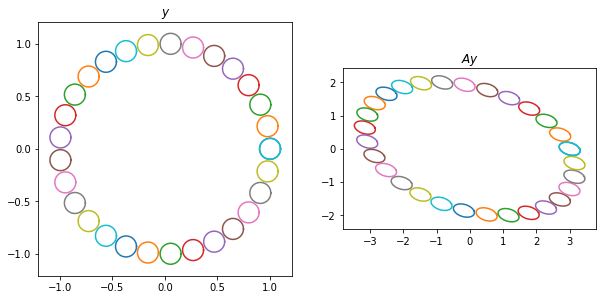

In [11]:
pt.figure(figsize=(10, 5))

pt.subplot(121)
pt.title("$y$")
pt.plot(ys[0], ys[1])
pt.gca().set_aspect("equal")

pt.subplot(122)
pt.title("$Ay$")
pt.plot(Ays[0], Ays[1])
pt.gca().set_aspect("equal")

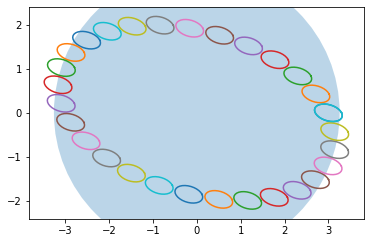

In [12]:
pt.plot(Ays[0], Ays[1])

ax = pt.gca()
ax.set_aspect("equal")
ax.add_artist(pt.Circle([0, 0], norm, alpha=0.3, lw=0))

What we want now is a circle around each of the $Ax$ that says:

"Because of the $\Delta x$ variation, $b=Ax$ is at most going to wiggle by this much, i.e. $\Delta b=A(x+\Delta x)-Ax=A\Delta x$ will be at most this big."

Not sure why they desided to use the condition number in this context, since for this problem we have the estimate (the one they are showing in the previous pictures by drawing the big blue circle whose radius is the norm of $A$):
$$
  \|A\|_2=\max\frac{\|Ax\|_2}{\|x\|_2}~\Rightarrow~\|Ax\|_2\leq \|A\|_2\cdot\|x\|_2.
$$

Thus,
$$
  \|\Delta b\|_2\leq \|A\|_2\cdot\|\Delta x\|_2.
$$

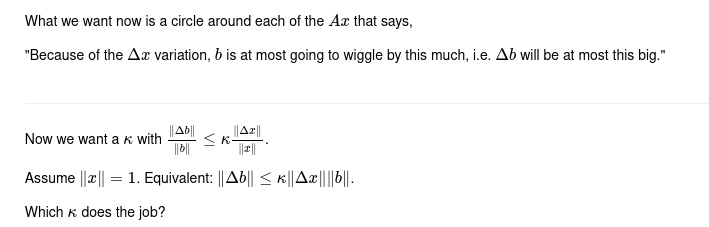

In [13]:
kappa = la.norm(A, 2)*la.norm(Ainv, 2)

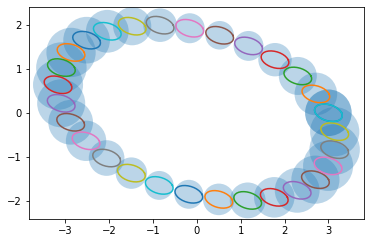

In [14]:
pt.plot(Ays[0], Ays[1])

ax = pt.gca()
ax.set_aspect("equal")
for i in range(Ays.shape[2]):
    b = Axs[:, i]
    norm_delta_y = kappa * perturbation_size * la.norm(b)
    ax.add_artist(pt.Circle(b, norm_delta_y, alpha=0.3, lw=0))